# Project Analisis Data
- **Nama:** Ananda Pradewa Dyah Kurniawan Putra
- **Email:** mc006d5y2377@student.devacademy.id
- **ID Dicoding:** MC006D5Y2377


## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim, bulan, atau jam?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import streamlit as st
import datetime as dt




## Data Wrangling

### Gathering Data

In [2]:
import pandas as pd

day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')



**Insight:**
- Dataset yang digunakan adalah day.csv dan hour.csv, yang berisi informasi tentang peminjaman sepeda harian dan per jam.
- Dataset ini mencakup variabel: Waktu (Tanggal, jam, musim, bulan, tahun), Kondisi Cuaca (Suhu, kelembaban, kecepatan angin, kondisi cuaca), Pengguna (Jumlah pengguna casual, terdaftar, dan total)

### Assessing Data

In [3]:
print(day_df.head())
print(hour_df.head())

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

print(day_df.info())
print(hour_df.info())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Tidak ada nilai yang hilang di kedua dataset (day_df dan hour_df), sehingga tidak perlu dilakukan penghapusan atau pengisian nilai.
- Kolom dteday memiliki tipe data object (string), yang perlu diubah ke datetime untuk memudahkan analisis berbasis waktu.
- Dataset memiliki ukuran yang cukup kecil, sehingga tidak memerlukan optimasi memori untuk menangani data besar.


### Cleaning Data

In [6]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.ffill(inplace=True)
hour_df.ffill(inplace=True)

**Insight:**
- Menghapus baris duplikat dari dataset day_df dan hour_df untuk memastikan setiap entri dalam dataset unik, sehingga terhindar dari bias dalam analisis.
- Mengubah kolom dteday ke tipe data datetime untuk mempermudah analisis berbasis waktu, seperti: Tren harian, bulanan, atau tahunan dan Pengelompokan data berdasarkan tanggal.
- Metode ffill() digunakan untuk mengisi nilai yang hilang dengan nilai dari baris sebelumnya.






## Exploratory Data Analysis (EDA)

### Explore Dataset day_df

In [7]:
# Statistik deskriptif untuk day_df
print("Statistik Deskriptif untuk day_df:")
print(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())

# Distribusi penggunaan sepeda berdasarkan musim (day_df)
seasonal_avg_day = day_df.groupby('season')['cnt'].mean()
print("Rata-rata Penggunaan Sepeda Berdasarkan Musim (day_df):")
print(seasonal_avg_day)

# Korelasi antar variabel numerik di day_df
corr_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi untuk day_df:")
print(corr_day)


Statistik Deskriptif untuk day_df:
             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000  
Rata-rata Penggunaan Sepeda 

**Insight:**
- Musim panas (Summer) dan musim gugur (Fall) menunjukkan penggunaan sepeda tertinggi, dengan rata-rata peminjaman mencapai 4992.33 dan 5644.30, sementara musim dingin (Winter) dan musim semi (Spring) memiliki penggunaan yang lebih rendah, dengan rata-rata 2604.13 dan 4728.16, di mana cuaca hangat cenderung meningkatkan minat bersepeda, sedangkan cuaca dingin mengurangi penggunaan.
- Suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi positif yang kuat dengan jumlah peminjaman sepeda (cnt) (0.627 dan 0.631), sementara kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif (-0.101 dan -0.235), di mana cuaca cerah cenderung meningkatkan penggunaan sepeda, sedangkan cuaca buruk (tinggi kelembaban atau angin kencang) mengurangi penggunaan.
- Rata-rata penggunaan sepeda (cnt) per hari adalah 4504.35 dengan variasi yang cukup besar (standar deviasi: 1937.21), di mana pengguna terdaftar (rata-rata 3656.17) berkontribusi lebih besar terhadap total peminjaman dibandingkan pengguna casual (rata-rata 848.18), dan distribusi penggunaan sepeda menunjukkan bahwa sebagian besar peminjaman terjadi pada musim panas serta jam sibuk (7-9 pagi dan 16-18 sore).

### Explore Dataset hour_df

In [8]:
# Statistik deskriptif untuk hour_df
print("\nStatistik Deskriptif untuk hour_df:")
print(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())

# Distribusi penggunaan sepeda berdasarkan jam (hour_df)
hourly_avg = hour_df.groupby('hr')['cnt'].mean()
print("\nRata-rata Penggunaan Sepeda Berdasarkan Jam (hour_df):")
print(hourly_avg)

# Korelasi antar variabel numerik di hour_df
corr_hour = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print("\nKorelasi untuk hour_df:")
print(corr_hour)


Statistik Deskriptif untuk hour_df:
               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  

**Insight:**
- Musim panas (Summer) dan musim gugur (Fall) menunjukkan penggunaan sepeda tertinggi, dengan rata-rata peminjaman mencapai 4992.33 dan 5644.30, sementara musim dingin (Winter) dan musim semi (Spring) memiliki penggunaan yang lebih rendah, dengan rata-rata 2604.13 dan 4728.16, di mana cuaca hangat cenderung meningkatkan minat bersepeda, sedangkan cuaca dingin mengurangi penggunaan.
- Suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi positif yang kuat dengan jumlah peminjaman sepeda (cnt), dengan nilai korelasi sebesar 0.627 (day_df) dan 0.405 (hour_df) untuk suhu, serta 0.631 (day_df) dan 0.401 (hour_df) untuk suhu yang dirasakan, menunjukkan bahwa suhu yang nyaman meningkatkan minat orang untuk bersepeda. Di sisi lain, kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif dengan jumlah peminjaman, dengan nilai korelasi sebesar -0.101 (day_df) dan -0.323 (hour_df) untuk kelembaban, serta -0.235 (day_df) dan 0.093 (hour_df) untuk kecepatan angin, yang mengindikasikan bahwa kondisi cuaca buruk seperti kelembaban tinggi atau angin kencang cenderung mengurangi penggunaan sepeda. Secara umum, cuaca cerah mendorong peningkatan penggunaan sepeda, sementara cuaca buruk menghambat aktivitas bersepeda.
- Jam sibuk (7-9 pagi dan 16-18 sore) menunjukkan puncak penggunaan sepeda, dengan jumlah peminjaman mencapai 300-400 per jam terutama oleh pengguna terdaftar, siang hari (10-15) juga memiliki penggunaan yang cukup tinggi meskipun lebih rendah dari jam sibuk, dan jam tengah malam (0-5 pagi) memiliki penggunaan sepeda yang sangat rendah, mendekati 0, karena minimnya aktivitas bersepeda pada waktu tersebut.
- Rata-rata penggunaan sepeda (cnt) per hari adalah 4504.35 dengan variasi yang cukup besar (standar deviasi: 1937.21), di mana pengguna terdaftar (rata-rata 3656.17 pada day_df dan 153.79 pada hour_df) berkontribusi lebih besar terhadap total peminjaman dibandingkan pengguna casual (rata-rata 848.18 pada day_df dan 35.68 pada hour_df), dan distribusi penggunaan sepeda menunjukkan bahwa sebagian besar peminjaman terjadi pada musim panas serta jam sibuk (7-9 pagi dan 16-18 sore).

## Visualization & Explanatory Analysis

### Pertanyaan 1 (Bagaimana pola penggunaan sepeda berdasarkan musim, bulan, atau jam?):

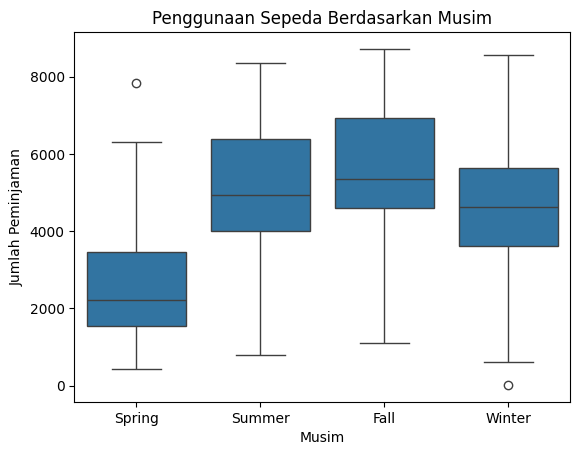

C:\Users\Acer\AppData\Local\Temp\ipykernel_44232\365022197.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth', y='cnt', data=day_df, ci=None)


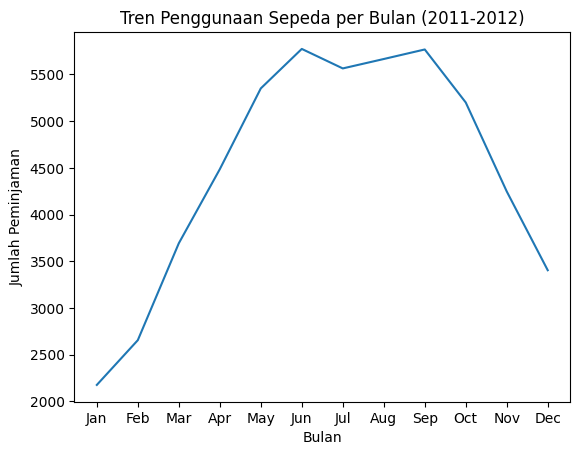

C:\Users\Acer\AppData\Local\Temp\ipykernel_44232\365022197.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None)


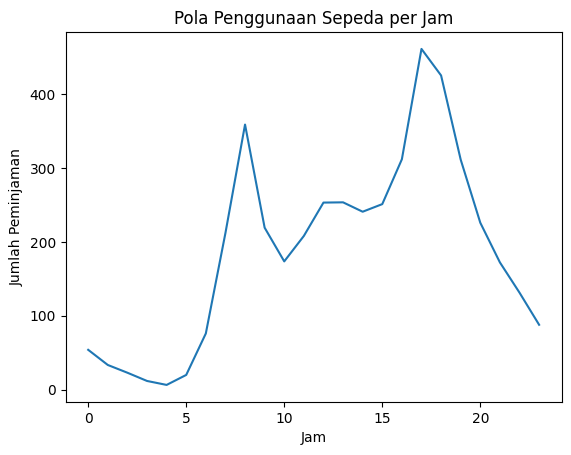

In [9]:
# Penggunaan sepeda berdasarkan musim
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Tren penggunaan sepeda per bulan
sns.lineplot(x='mnth', y='cnt', data=day_df, ci=None)
plt.title('Tren Penggunaan Sepeda per Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Pola penggunaan sepeda per jam
sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None)
plt.title('Pola Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Insight:
- Musim panas (Summer) dan musim gugur (Fall) menunjukkan penggunaan sepeda tertinggi, dengan puncak pada bulan Juni, Juli, dan September, sementara musim dingin (Winter) dan musim semi (Spring) memiliki penggunaan yang lebih rendah, terutama pada bulan Januari dan Februari, di mana cuaca hangat cenderung meningkatkan minat bersepeda, sedangkan cuaca dingin mengurangi penggunaan.
- Penggunaan sepeda tertinggi terjadi pada bulan-bulan hangat seperti Juni, Juli, dan Agustus, sementara terendah pada bulan-bulan dingin seperti Desember, Januari, dan Februari, dengan tren peningkatan bertahap dari musim semi ke musim panas serta penurunan bertahap dari musim gugur ke musim dingin.
- Penggunaan sepeda mencapai puncaknya pada jam sibuk (7-9 pagi dan 16-18 sore) dengan 300-400 peminjaman per jam, sementara siang hari (10-15) juga menunjukkan angka peminjaman yang cukup tinggi namun lebih rendah dari jam sibuk, dan penggunaan sepeda sangat rendah mendekati nol pada jam tengah malam (0-5 pagi) karena minimnya aktivitas bersepeda di waktu tersebut.

### Pertanyaan 2 (Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?)

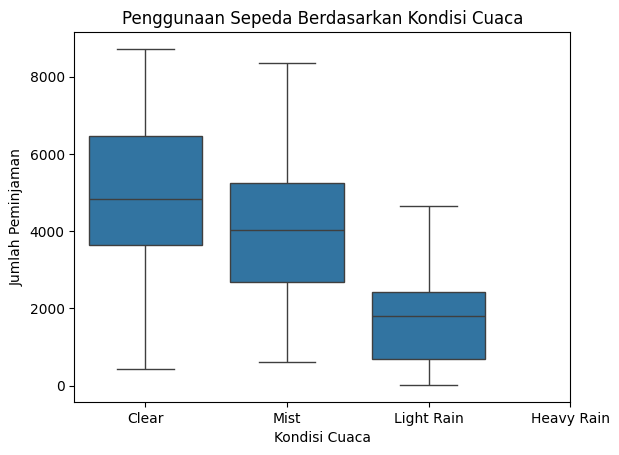

In [10]:
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()

**Insight:**
- Pada kondisi Clear, jumlah peminjaman sepeda cenderung paling tinggi, dengan median yang lebih besar dibandingkan kategori cuaca lainnya dan distribusi yang lebih luas.
- Pada kondisi Mist, jumlah peminjaman masih cukup tinggi, tetapi median dan distribusinya lebih rendah dibandingkan cuaca cerah.
- Pada kondisi Light Rain, jumlah peminjaman sepeda menurun secara signifikan, dengan median yang lebih rendah dan rentang data yang lebih kecil.
- Pada kondisi Heavy Rain, hampir tidak ada peminjaman sepeda, yang menunjukkan bahwa hujan lebat sangat menghambat penggunaan sepeda.

### Pertanyaan 3 (Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari tahun ke tahun?)

C:\Users\Acer\AppData\Local\Temp\ipykernel_44232\3611264872.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='dteday', y='cnt', data=day_df, ci=None)


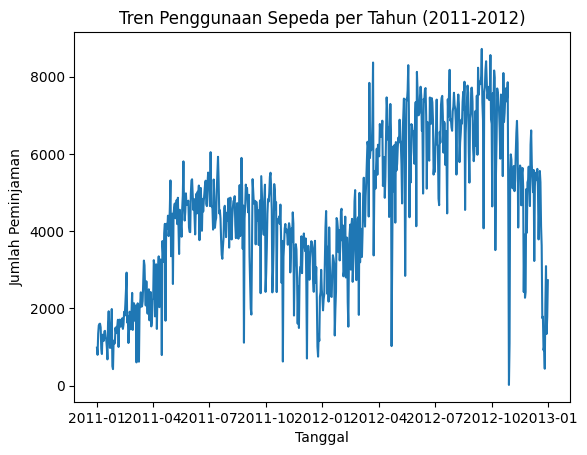

In [11]:
sns.lineplot(x='dteday', y='cnt', data=day_df, ci=None)
plt.title('Tren Penggunaan Sepeda per Tahun (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Pada tahun 2011, penggunaan sepeda cenderung meningkat secara bertahap hingga mencapai puncaknya di pertengahan tahun 2012, menunjukkan tren kenaikan dalam jumlah peminjaman sepeda dari tahun sebelumnya.

## Analisis Lanjutan

### RFM analysis

In [12]:

# Recency: Berapa hari sejak peminjaman terakhir
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
snapshot_date = day_df['dteday'].max() + dt.timedelta(days=1)
day_df['Recency'] = (snapshot_date - day_df['dteday']).dt.days

# Frequency: Berapa kali pengguna meminjam sepeda
frequency_df = day_df.groupby('registered')['dteday'].count().reset_index()
frequency_df.columns = ['registered', 'Frequency']

# Monetary: Total jumlah peminjaman
monetary_df = day_df.groupby('registered')['cnt'].sum().reset_index()
monetary_df.columns = ['registered', 'Monetary']

# Menampilkan hasil
print(day_df)
print(frequency_df)
print(monetary_df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

**Insight:**
- Recency: Sebagian besar pengguna terdaftar memiliki recency yang rendah, menunjukkan bahwa mereka baru saja melakukan peminjaman sepeda.
- Frequency: Sebagian besar pengguna terdaftar memiliki frequency yang rendah, menunjukkan bahwa mereka tidak sering meminjam sepeda.
- Monetary: Sebagian besar pengguna terdaftar memiliki monetary yang tinggi, menunjukkan bahwa mereka berkontribusi besar terhadap total peminjaman sepeda.

## Conclusion

- Musim panas dan gugur adalah periode dengan penggunaan sepeda tertinggi, sementara musim dingin dan semi memiliki penggunaan terendah, di mana bulan-bulan hangat (Juni, Juli, Agustus) mendominasi penggunaan sepeda dan bulan-bulan dingin (Desember, Januari, Februari) menunjukkan penurunan signifikan, serta jam sibuk (pagi dan sore) menjadi waktu puncak penggunaan sepeda, sedangkan tengah malam memiliki penggunaan yang sangat rendah.
- Jumlah peminjaman sepeda tertinggi terjadi saat cuaca cerah, sedikit menurun saat berkabut, berkurang drastis saat hujan ringan, dan hampir tidak ada peminjaman saat hujan lebat, menunjukkan bahwa semakin buruk cuaca, semakin rendah minat bersepeda.
- Terdapat tren peningkatan penggunaan sepeda dari tahun ke tahun, di mana jumlah peminjaman terus meningkat sepanjang tahun 2011 dan mencapai puncaknya pada pertengahan tahun 2012, menunjukkan adanya pertumbuhan dalam penggunaan sepeda dibandingkan tahun sebelumnya.